# UKBB Guido subset_ main thesis project -ReHo

In [1]:
import pandas as pd
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, ConcatDataset, TensorDataset
from torchvision import transforms
from sklearn.model_selection import KFold
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## start of classsification using Reho

In [2]:
control_base_path = '/dbstore/zmohaghegh/UKBiobank_subset/Summary_measure_new/Control/ReHo/ReHo_Normalised_z/'
mdd_base_path = '/dbstore/zmohaghegh/UKBiobank_subset/Summary_measure_new/MDD/ReHo/ReHo_Normalised_z/'

#define data path for control and MDD seprately

control_files_path = [control_base_path + f for f in os.listdir(control_base_path) if f.startswith('ReHo')]
mdd_files_path = [mdd_base_path + f for f in os.listdir(mdd_base_path) if f.startswith('ReHo')]
print(len(control_files_path), len(mdd_files_path))

406 401


### load data with nan 

In [3]:
#loading data seprately and set a label column for Control=0 and MDD=1

control_dataset_reho_zero = [[nib.load(c).get_fdata(),0] for c in control_files_path]
mdd_dataset_reho_zero = [[nib.load(m).get_fdata(),1] for m in mdd_files_path]

##### define numpy array for doing the zero nan

In [4]:
control_reho_zero_nan2= control_dataset_reho_zero
mdd_reho_zero_nan2 = mdd_dataset_reho_zero

print(mdd_reho_zero_nan2[0][0].shape)
print(len(mdd_reho_zero_nan2))
print(mdd_reho_zero_nan2[0][1])

mdd_reho_zero_nan3 = np.array(mdd_reho_zero_nan2)
control_reho_zero_nan3 =np.array(control_reho_zero_nan2)
print(control_reho_zero_nan2[0][0].shape)
print(len(control_reho_zero_nan2))

control_reho_zero_nan3[0][1]

(91, 109, 91)
401
1
(91, 109, 91)
406


/data/zmohaghegh/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/data/zmohaghegh/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


0

In [5]:
len(mdd_dataset_reho_zero)

401

In [6]:
len(control_dataset_reho_zero)

406

In [7]:
len(mdd_dataset_reho_zero[0])
len(control_dataset_reho_zero[0])

2

In [8]:
mdd_dataset_reho_zero[0][0].shape
control_dataset_reho_zero[0][0].shape

(91, 109, 91)

In [9]:
control_dataset_reho_zero[400][0][:,34,56]

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  1.12550211,  1.15470362,  1.21175969,  1.24106169,
        1.27152824,  1.30393469,  1.31607091,  1.15562212,  0.73888594,
        0.51428944,  0.82918566,  1.03576005,  0.80490899,  0.3247368 ,
        0.09796771,  0.13353619,  0.11749519,  0.32198218,  0.72249311,
        0.51509976, -0.4462651 , -0.98521936, -0.76221055, -0.26030189,
        0.44888762,  1.03747642,  1.25865352,  1.30971968,  1.27973843,
        1.19814634,  1.08664191,  0.96786159,  0.79747653,  0.60798132,
        0.46213761,  0.29620972,  0.17520891, -0.13644496, -1.05051053,
       -2.3524518 , -2.04095626, -0.80242002, -0.78191942, -0.40896198,
        0.33673894,  0.86772221,  1.09378672,  1.26220214,  1.40480113,
        1.44873357,  1.37333369,  1.2148087 ,  1.05106485,  0.94

In [10]:
mdd_dataset_reho_zero[200][0][:,34,56]

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  1.21149242,  1.32380092,  1.37073934,  1.4142952 ,
        1.44033265,  1.39442766,  1.28269625,  1.09229827,  0.47384778,
       -0.35695356, -0.39824989,  0.05438031,  0.16181107,  0.05587393,
        0.11543607,  0.01960329, -0.29691103, -0.49344996, -0.70651323,
       -0.96867234, -1.11298954, -0.68337023,  0.03072086,  0.68174613,
        0.95977503,  1.05144298,  1.15947974,  1.28555131,  1.37307799,
        1.43382919,  1.44437182,  1.49855125,  1.58629799,  1.60798669,
        1.58436382,  1.30921352,  0.59295458, -0.22422616, -0.62735111,
       -0.94800943, -1.41227424, -1.85290849, -1.89540088, -1.45713973,
       -0.5410347 ,  0.52465016,  0.99950457,  1.28322899,  1.42436516,
        1.47826397,  1.47122824,  1.39253831,  1.3458854 ,  1.37

In [11]:
#example control
zero_nan_control_800= np.nan_to_num(control_dataset_reho_zero[400][0],copy=True)
zero_nan_control_800[:,34,56]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.12550211,  1.15470362,  1.21175969,  1.24106169,
        1.27152824,  1.30393469,  1.31607091,  1.15562212,  0.73888594,
        0.51428944,  0.82918566,  1.03576005,  0.80490899,  0.3247368 ,
        0.09796771,  0.13353619,  0.11749519,  0.32198218,  0.72249311,
        0.51509976, -0.4462651 , -0.98521936, -0.76221055, -0.26030189,
        0.44888762,  1.03747642,  1.25865352,  1.30971968,  1.27973843,
        1.19814634,  1.08664191,  0.96786159,  0.79747653,  0.60798132,
        0.46213761,  0.29620972,  0.17520891, -0.13644496, -1.05051053,
       -2.3524518 , -2.04095626, -0.80242002, -0.78191942, -0.40896198,
        0.33673894,  0.86772221,  1.09378672,  1.26220214,  1.40480113,
        1.44873357,  1.37333369,  1.2148087 ,  1.05106485,  0.94

In [12]:
#example mdd
zero_nan_mdd_700= np.nan_to_num(mdd_dataset_reho_zero[200][0],copy=True)
zero_nan_mdd_700[:,34,56]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.21149242,  1.32380092,  1.37073934,  1.4142952 ,
        1.44033265,  1.39442766,  1.28269625,  1.09229827,  0.47384778,
       -0.35695356, -0.39824989,  0.05438031,  0.16181107,  0.05587393,
        0.11543607,  0.01960329, -0.29691103, -0.49344996, -0.70651323,
       -0.96867234, -1.11298954, -0.68337023,  0.03072086,  0.68174613,
        0.95977503,  1.05144298,  1.15947974,  1.28555131,  1.37307799,
        1.43382919,  1.44437182,  1.49855125,  1.58629799,  1.60798669,
        1.58436382,  1.30921352,  0.59295458, -0.22422616, -0.62735111,
       -0.94800943, -1.41227424, -1.85290849, -1.89540088, -1.45713973,
       -0.5410347 ,  0.52465016,  0.99950457,  1.28322899,  1.42436516,
        1.47826397,  1.47122824,  1.39253831,  1.3458854 ,  1.37

In [13]:
#zero_nan_control
print(control_reho_zero_nan3.shape)
print(control_reho_zero_nan3[0][0].shape)
print(control_reho_zero_nan3[0][1])
print(control_reho_zero_nan3[100][1])
print(control_reho_zero_nan3[0].shape)
print(type(control_reho_zero_nan3))


for i in range(len(control_dataset_reho_zero)):    
    control_reho_zero_nan3[i][0] =np.nan_to_num(control_dataset_reho_zero[i][0],copy=True)
    control_reho_zero_nan3[i][1] =np.nan_to_num(control_dataset_reho_zero[i][1],copy=True)

(406, 2)
(91, 109, 91)
0
0
(2,)
<class 'numpy.ndarray'>


In [14]:
print(control_reho_zero_nan3.shape)
print(control_reho_zero_nan3[0][0].shape)
print(control_reho_zero_nan3[0][1]) ## mdd label for control=0
print(control_reho_zero_nan3[310][1])
control_reho_zero_nan3[310][0][:,34,56]


(406, 2)
(91, 109, 91)
0
0


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.03706789,  0.9384445 ,  1.02045286,  1.08525765,
        1.14096582,  1.2619375 ,  1.3255043 ,  1.24580979,  0.97607547,
        0.65649235,  0.61685491,  0.89809757,  1.12224627,  1.19249892,
        1.09637868,  0.34877521, -1.27452624, -1.91937733, -1.69016302,
       -1.55144036, -1.6726886 , -2.33689332, -1.64726007,  0.19250433,
        0.8690486 ,  1.02865875,  1.13394439,  1.16226077,  1.1960578 ,
        1.24796295,  1.25617349,  1.12054193,  0.8205567 ,  0.62111205,
        0.63774258,  0.77285439,  0.67045969, -0.15786178, -1.08324039,
       -1.17349052, -1.23186243, -1.36752427, -1.68216169, -1.93453085,
       -2.13499188, -1.60536325, -0.33979508,  0.63937038,  1.09100926,
        1.16399229,  1.05315506,  1.00087965,  1.06204903,  1.14

In [15]:
#zero_nan_mdd

print(mdd_reho_zero_nan3.shape)
print(mdd_reho_zero_nan3[0][0].shape)
print(type(mdd_reho_zero_nan3))

for i in range(len(mdd_dataset_reho_zero)):    
    mdd_reho_zero_nan3[i][0] =np.nan_to_num(mdd_dataset_reho_zero[i][0],copy=True)
    mdd_reho_zero_nan3[i][1] =np.nan_to_num(mdd_dataset_reho_zero[i][1],copy=True)

mdd_reho_zero_nan3.shape

(401, 2)
(91, 109, 91)
<class 'numpy.ndarray'>


(401, 2)

In [16]:
print(mdd_reho_zero_nan3.shape)

mdd_reho_zero_nan3.shape
print(mdd_reho_zero_nan3[0][0].shape)
print(mdd_reho_zero_nan3[0].shape)
print(mdd_reho_zero_nan3[0][1])
mdd_reho_zero_nan3[210][0][:,34,56]

(401, 2)
(91, 109, 91)
(2,)
1


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.56254029, -0.62003809, -0.57283431, -0.50712872,
       -0.30198112, -0.0582086 ,  0.02541892, -0.01032379, -0.11676157,
       -0.2859858 , -0.18603709,  0.33650085,  0.86129177,  0.83771479,
        0.19064164, -0.68813682, -1.23493278, -1.21529114, -0.88047671,
       -0.66947949, -0.76486373, -0.75320095, -0.13258187,  0.6074875 ,
        0.9118017 ,  0.98118085,  0.99861676,  1.03189039,  1.06631362,
        1.07297766,  0.96297002,  0.65217191,  0.22133434, -0.17221576,
       -0.29581794,  0.03177249,  0.23534812,  0.09004166, -0.32193381,
       -0.83996934, -0.72975945, -0.10848653,  0.08674272, -0.11443979,
       -0.26144397, -0.10588351,  0.23360884,  0.47974265,  0.44174951,
       -0.04003727, -0.47461516, -0.18290855,  0.38045034,  0.69

### load and add 1 channel to dimension of data 'without nan'

In [17]:
# np.reshape(control_dataset[0][0], (1, 91, 109, 91))

control_reho_4d_zero_nan = [[np.reshape(c[0], (1, 91, 109, 91)), c[1]] for c in control_reho_zero_nan3]
mdd_reho_4d_zero_nan = [[np.reshape(m[0], (1, 91, 109, 91)), m[1]] for m in mdd_reho_zero_nan3]

In [18]:
print(mdd_reho_4d_zero_nan[200][0].shape)
mdd_reho_4d_zero_nan[200][1]

(1, 91, 109, 91)


1

In [19]:
print(control_reho_4d_zero_nan[400][0].shape)
control_reho_4d_zero_nan[400][1]

(1, 91, 109, 91)


0

In [20]:
len(mdd_reho_4d_zero_nan)

401

In [21]:
len(mdd_reho_4d_zero_nan[0])

2

### concat data for control and MDD without nan

In [22]:
dataset_ukbb_reho_zero_nan= ConcatDataset([control_reho_4d_zero_nan, mdd_reho_4d_zero_nan])

print(dataset_ukbb_reho_zero_nan[0][0].shape)
print(dataset_ukbb_reho_zero_nan[500][1])
print(dataset_ukbb_reho_zero_nan[310][1])


dataset_ukbb_reho_zero_nan[500][0][0,:,54,45]

#subject number=1500, mdd label,reho value for voxels along axial with y ,z dimention = 54,45

(1, 91, 109, 91)
1
0


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.13979426,  0.26504141,  0.79321927,  1.03530395,
        0.95822531,  0.72130316,  0.54342115,  0.52703273,  0.38807321,
       -0.36160758, -1.00250971, -0.92002475, -0.59315968, -0.33839601,
       -0.24098404, -0.24408905, -0.45129445, -1.23698962, -1.6253171 ,
       -1.3776747 , -0.95998418, -0.6003564 , -0.25603795, -0.38067424,
       -0.86593616, -1.38537419, -1.84334159, -2.28111601, -2.12450886,
       -1.84475493, -1.85137296, -1.74967813, -1.47786558, -1.3160212 ,
       -1.28893721, -1.27241957, -1.34027207, -1.64550495, -2.09431171,
       -2.0272963 , -1.54926789, -2.01730371, -2.71395802, -2.86028552,
       -2.20267773, -1.36556864, -1.18109953, -1.1811223 , -1.12405205,
       -1.02910972, -0.9689374 , -0.48387772,  0.2121698 ,  0.79681349,
        1.03762221,  1.13592207,  1.12907672,  1.10616612,  0.92

In [23]:
len(dataset_ukbb_reho_zero_nan)

807

In [24]:
len(dataset_ukbb_reho_zero_nan[0])

2

In [25]:
print(dataset_ukbb_reho_zero_nan[200][1]) # subject 800 label MDD =0
print(dataset_ukbb_reho_zero_nan[500][1]) # subject 1500 label MDD =1 

#problem solved : mdd_zero_nan label have problem : instead of 1 integer we have an array (91,109,91)

print(dataset_ukbb_reho_zero_nan[0][1])

dataset_ukbb_reho_zero_nan[500][1].shape

0
1
0


()

In [26]:
dataset_ukbb_reho_zero_nan[500][1]

1

### Network architecture

In [27]:
#Define a Convolutional Neural Network : BASED ON https://www.biorxiv.org/content/10.1101/2019.12.17.879346v1

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.downsample = nn.AvgPool3d(2, stride=2, padding=0)
        
        self.CNNlayer = nn.Sequential(
            nn.Conv3d(1, 64, kernel_size=3, stride=1),
            nn.ELU(),
            nn.Conv3d(64, 16, kernel_size=3, stride=1),
            nn.ELU(),
            nn.MaxPool3d(2)
        )
        
        self.flat1 = nn.Linear(160000, 16)   
        self.flat2 = nn.Linear(16, 1)
            
    def forward(self, x):
        x=self.downsample(x)
        #print(f'avg-pool: {x.size()}\n----------')
        #print(f'number of nan in this layer = {torch.isnan(x).sum()}')
        
        x=self.CNNlayer(x)
        #print(f'convolution1+2+maxpool: {x.size()} \n----------')
        
        x=x.reshape(x.size(0), -1)
        #print(f'reshape after cnn: {x.size()}\n----------')
        
        x=F.elu(self.flat1(x))
        #print(f'fully-connected1: {x.size()}\n----------')
                    
        x=self.flat2(x)
        #print(f'fully-connected2: {x.size()}\n----------')
        
        return x

### lunch wandb

In [28]:
import wandb
!wandb login 390734ff44d817dbba59927d4eb542e564627b3b

wandb: Appending key for api.wandb.ai to your netrc file: /data/zmohaghegh/.netrc


### Train and Test (without CV)

In [29]:
### spilit data to train-test and validation

dataset_size= len(dataset_ukbb_reho_zero_nan)
train_count = int(0.7 * dataset_size) 
valid_count= int(0.2 * dataset_size)
test_count = dataset_size - train_count -valid_count

print(dataset_size)
print(train_count)
print(valid_count)
print(test_count)

807
564
161
82


In [30]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score,confusion_matrix

In [31]:
wandb.init(project='MDD-guido2020-classification-Reho')  

#define the newtwork 
network = ConvNet()
network = network.double()

#set hyper parameter
learning_rate= 0.001
num_epochs = 10
BATCH_SIZE = 10
best_acc= None

# Define a Loss function 
loss_function = nn.BCEWithLogitsLoss()  

# create the optimizer
optimizer = optim.SGD(network.parameters(), momentum=0.9, lr = learning_rate, weight_decay=1e-3)

# load data splits
train_dataset, test_dataset ,valid_dataset = torch.utils.data.random_split(dataset_ukbb_reho_zero_nan, (train_count, test_count,valid_count))

train_dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)  
test_dataset_loader  = torch.utils.data.DataLoader(test_dataset , batch_size=BATCH_SIZE, shuffle=False)
valid_dataset_loader  = torch.utils.data.DataLoader(valid_dataset , batch_size=BATCH_SIZE, shuffle=True)


#dataloaders = {'train': train_dataset_loader, 'test': test_dataset_loader, 'valid': valid_dataset_loader}

network.train()
# start training loop:
for epoch in range(0, num_epochs):
    print(f'*********Starting epoch {epoch+1}')
    
    train_loss = 0
    total =0 
    correct = 0
    
    # train model/network 
    for i, data in enumerate(train_dataset_loader, 0):
        #print(f'train {i}')
            
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
            
        # zero the gradient buffers
        optimizer.zero_grad()
            
        # forward pass
        outputs = network(inputs)
    
        outputss = outputs.squeeze(1) #### [10,1] ---> [10]
        
        #nloss requires a 1-D tensor of class indices of the target (outputs in your case) but not one-hot vectors of the target.
        #The shape of the target should be [mini_batch_size], 
        #but in your case it happens to be [mini_batch_size,num_classes].
        
        predicted = outputss.data > 0.0 # the loss function contain also a sigmoid layer <0 = false >0 =true
        
        labels = labels.double()
        
        #calcuate loss/error
        loss = loss_function(outputss, labels)
              
        # backward pass
        loss.backward()
            
        # Does the update , gradient descent
        optimizer.step() 
            
        #loss_list.append(loss.item())
        train_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print(f'acc_train :{100 * correct/total}')
    print (f'loss_train = {train_loss/total}')
    
    wandb.log({ "epoch_reho": epoch ,"train_Loss_reho": train_loss/total, "trian_acc_reho" :100 * correct /total })

    
    print('Training process has finished') 

    print('starting validation :')

    network.eval()

    valid_loss=0
    total=0
    correct=0

    with torch.no_grad():
        for i, data in enumerate(valid_dataset_loader, 0):
            #print(f'valid {i}')
            inputs, lables = data

            outputs = network(inputs)

            outputss=outputs.squeeze(1) #[10,1] ---> [10]
            lables=lables.double()

            # prediction 
            predicted = outputss.data > 0.0

            loss = loss_function(outputss, lables)

            valid_loss += loss.item()
            total += lables.size(0)
            correct += (predicted == lables).sum().item()

        print(f'acc_valid :{100 * correct/total}')
        print (f'loss_valid = {valid_loss/total}')

        wandb.log({ "validation_acc_reho" :100 * correct /total, "validation_Loss_reho": valid_loss/total })

        current_valid_acc =100 * correct/total
        if not best_acc or best_acc < current_valid_acc:
            best_acc = current_valid_acc
            
            print('Saving trained model.')
            PATH_best = './model-best acc-reho.pth'
            torch.save(network.state_dict(), PATH_best)
        print('validation process has finished.')

wandb: Currently logged in as: zahramhn (use `wandb login --relogin` to force relogin)


*********Starting epoch 1
acc_train :50.53191489361702
loss_train = 0.07077743874119233
Training process has finished
starting validation :
acc_valid :48.4472049689441
loss_valid = 0.07307865044012148
Saving trained model.
validation process has finished.
*********Starting epoch 2
acc_train :52.4822695035461
loss_train = 0.06836081913283923
Training process has finished
starting validation :
acc_valid :53.41614906832298
loss_valid = 0.07281517754589399
Saving trained model.
validation process has finished.
*********Starting epoch 3
acc_train :65.95744680851064
loss_train = 0.06412676532442559
Training process has finished
starting validation :
acc_valid :53.41614906832298
loss_valid = 0.08044443809316143
validation process has finished.
*********Starting epoch 4
acc_train :75.53191489361703
loss_train = 0.054450208451695195
Training process has finished
starting validation :
acc_valid :53.41614906832298
loss_valid = 0.08519696095374737
validation process has finished.
*********Starting

### Test the network using the test data without CV

In [32]:
network.load_state_dict(torch.load(PATH_best))

test_loss = 0
correct = 0
total= 0

print('Starting testing')

network.eval()

with torch.no_grad():
    for i, data in enumerate(test_dataset_loader, 0):
        #print(f'test {i}')
        
        inputs, lables = data
        lables = lables.double() # loss function get only double not Long
        
        outputs = network(inputs)
        #print(outputs.size())
        
        outputss = outputs.squeeze(1) #[10,1] ---> [10]
        #print(outputss.size())
        #print(lables.size())
    
        predicted = outputss.data > 0.0
        
        loss = loss_function(outputss, lables)
        
        test_loss += loss.item()
        total += lables.size(0)
        correct += (predicted == lables).sum().item()
        
    wandb.log({ "test_Accuracy_reho": 100 * correct /total  , "test_Loss_reho": test_loss/total })

    print(f'test_loss= {test_loss/total}')
    print(f'test_acc= {100 * correct / total}')

Starting testing
test_loss= 0.07411652745575432
test_acc= 56.09756097560975


## Cross validation loop 

In [33]:
from sklearn.model_selection import train_test_split
train_dataset_cv, test_dataset_cv = train_test_split(dataset_ukbb_reho_zero_nan, test_size=0.20, train_size=0.8,shuffle=True)
print(len(train_dataset_cv))
len(test_dataset_cv)

645


162

### train and validation loop CV

In [34]:
wandb.init(project='MDD-guido2020-classification-Reho')  

k_folds = 5
kfold_results = {}
kfold = KFold(n_splits=k_folds, shuffle=True)

#torch.manual_seed(42)
num_epochs = 10
batch_size = 10
learning_rate= 0.001

#Define a Loss function 
loss_function = nn.BCEWithLogitsLoss()

for fold, (train_ids, valid_ids) in enumerate(kfold.split(train_dataset_cv)):
    best_acc_cv= None
    
    print(f"FOLD {fold}\n--------------------------------")
    
    # Sample elements randomly from a given list of ids,
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    valid_subsampler = torch.utils.data.SubsetRandomSampler(valid_ids)
    
    # Define data loaders for training and testing data in this fold
    train_loader = torch.utils.data.DataLoader(train_dataset_cv, batch_size=batch_size, sampler=train_subsampler)
    valid_loader = torch.utils.data.DataLoader(train_dataset_cv, batch_size=batch_size, sampler=valid_subsampler)
    
    #define network
    network = ConvNet()
    network = network.double()
    
    # create our optimizer
    optimizer = optim.SGD(network.parameters(), momentum=0.9, lr = learning_rate, weight_decay=1e-3)
    
    # in the training loop:
    
    network.train() # prepare model for training
    
    for epoch in range(0, num_epochs):
        print(f'*********Starting epoch {epoch+1}')
        
        train_loss_cv = 0
        total =0
        correct=0

        # train model/network 
        for i, data in enumerate(train_loader, 0):
            #print(f'train {i}')
            
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            
            # zero the gradient buffers
            optimizer.zero_grad()
            
            # forward pass
            outputs = network(inputs)
            
            # print(outputs.size)
            outputss=outputs.squeeze(1) #### [10,1] ---> [10]
            
            # prediction 
            predicted = outputss.data > 0.0
            
            labels=labels.double()
            
            #calcuate loss/error
            loss = loss_function(outputss, labels)
            
            # backward pass
            loss.backward()
            
            # Does the update , gradient descent
            optimizer.step() 
            
            correct += (predicted == labels).sum().item()
            train_loss_cv += loss.item()
            total += labels.size(0)
            
        wandb.log({ "epoch_cv": epoch , "train_Loss_cv": train_loss_cv/total, "train_acc_cv": 100 * correct / total })
        
        print(f'train loss= {train_loss_cv/total}')
        print(f'train Acc= {100 * correct / total}')
        
        
        print('Training process has finished.')
        print('Start validating')

        # validate the network using the validation data, for this fold
        correct= 0
        total = 0
        valid_loss_cv=0
        
        network.eval()

        with torch.no_grad():
            for i, data in enumerate(valid_loader, 0):
                #print(f'test {i}')

                inputs, lables = data

                outputs = network(inputs)

                outputss=outputs.squeeze(1) #[10,1] ---> [10]
                lables=lables.double()

                # prediction 
                predicted = outputss.data > 0.0

                loss = loss_function(outputss, lables)

                valid_loss_cv += loss.item()
                total += lables.size(0)
                correct += (predicted == lables).sum().item()

            wandb.log({ "validation_acc_cv": 100 * correct /total, "validation_Loss_cv": valid_loss_cv/total })
            
            current_valid_acc_cv = 100 * correct /total
            
            print(f'valid_acc :{100 * correct /total}')
            print(f'valid_loss: {valid_loss_cv/total}')
                  
            if not best_acc_cv or best_acc_cv < current_valid_acc_cv:
                best_acc_cv = current_valid_acc_cv
                
                print('Saving best valid -trained model.')
                path_best_acc_reho = f'/data/zmohaghegh/TempStats_3D-CNN/best_valid_acc_reho_2020/model-best-reho-fold-{fold}.pth'
                torch.save(network.state_dict(), path_best_acc_reho )
                
            print('validation process has finished')
                
    print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
    print('--------------------------------')
        
    kfold_results[fold] = 100.0 * (correct / total)

epoch_reho,9
train_Loss_reho,0.00104
trian_acc_reho,100.0
_runtime,7583
_timestamp,1623625861
_step,20
validation_acc_reho,47.82609
validation_Loss_reho,0.13998
test_Accuracy_reho,56.09756
test_Loss_reho,0.07412


epoch_reho,▁▂▃▃▄▅▆▆▇█
train_Loss_reho,██▇▆▅▄▃▂▁▁
trian_acc_reho,▁▁▃▅▆▆▇███
_runtime,▁▁▂▂▃▃▃▄▄▄▅▅▆▆▇▇▇▇███
_timestamp,▁▁▂▂▃▃▃▄▄▄▅▅▆▆▇▇▇▇███
_step,▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▆▇▇▇██
validation_acc_reho,▂███▂▃▃▆▄▁
validation_Loss_reho,▁▁▂▂▂▄▅▆▇█
test_Accuracy_reho,▁
test_Loss_reho,▁


FOLD 0
--------------------------------
*********Starting epoch 1
train loss= 0.07148051569507151
train Acc= 53.29457364341085
Training process has finished.
Start validating
valid_acc :48.83720930232558
valid_loss: 0.069807225871141
Saving best valid -trained model.
validation process has finished
*********Starting epoch 2
train loss= 0.06911413141108251
train Acc= 56.97674418604651
Training process has finished.
Start validating
valid_acc :51.16279069767442
valid_loss: 0.0695247294768989
Saving best valid -trained model.
validation process has finished
*********Starting epoch 3
train loss= 0.06875404701411143
train Acc= 53.48837209302326
Training process has finished.
Start validating
valid_acc :52.713178294573645
valid_loss: 0.06972361669198289
Saving best valid -trained model.
validation process has finished
*********Starting epoch 4
train loss= 0.06442025278299598
train Acc= 63.75968992248062
Training process has finished.
Start validating
valid_acc :53.48837209302326
valid_loss: 

valid_acc :46.51162790697674
valid_loss: 0.07694173675295345
validation process has finished
*********Starting epoch 5
train loss= 0.05625072590337056
train Acc= 71.12403100775194
Training process has finished.
Start validating
valid_acc :45.736434108527135
valid_loss: 0.07941031511328131
validation process has finished
*********Starting epoch 6
train loss= 0.043108774786137616
train Acc= 83.33333333333333
Training process has finished.
Start validating
valid_acc :54.263565891472865
valid_loss: 0.09236932055424604
Saving best valid -trained model.
validation process has finished
*********Starting epoch 7
train loss= 0.02845642549939242
train Acc= 89.72868217054264
Training process has finished.
Start validating
valid_acc :55.03875968992248
valid_loss: 0.09133456446839579
Saving best valid -trained model.
validation process has finished
*********Starting epoch 8
train loss= 0.012549432366309989
train Acc= 98.64341085271317
Training process has finished.
Start validating
valid_acc :54.26

### results of train and validation for CV

In [35]:
print(f"K-FOLD CROSS VALIDATION RESULTS FOR reho {k_folds} FOLDS\n--------------------------------")
_sum = 0.0

for key, value in kfold_results.items():
    print(f'Fold {key}: {value} %')
    _sum += value

print(f'Average: {_sum/len(kfold_results.items())} %')

K-FOLD CROSS VALIDATION RESULTS FOR reho 5 FOLDS
--------------------------------
Fold 0: 49.6124031007752 %
Fold 1: 58.91472868217055 %
Fold 2: 45.73643410852713 %
Fold 3: 51.93798449612403 %
Fold 4: 53.48837209302325 %
Average: 51.93798449612403 %


### Test loop for Cross validation 

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

epoch_cv,9
train_Loss_cv,0.00108
train_acc_cv,100.0
_runtime,26713
_timestamp,1623652578
_step,99
validation_acc_cv,53.48837
validation_Loss_cv,0.11333


epoch_cv,▁▂▃▃▅▆▆▇▁▂▃▃▅▆▆▇▁▂▃▃▅▆▆▇▁▂▃▃▅▆▆▇▁▂▃▃▅▆▆█
train_Loss_cv,███▇▅▃▂▂████▇▆▅▃██▇▇▄▃▂▂██▇▇▅▄▂▁██▇▆▄▂▁▁
train_acc_cv,▂▂▂▃▅▇██▁▂▁▂▄▅▅▇▂▂▃▄▆▇██▁▂▄▃▆▇██▁▂▄▅▇▇██
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
validation_acc_cv,▄▅▅▆▆▆▆▆▆▅▅▅█▅▆▇▇▄▇▇▅▂▄▂▃▁▃▃▆▆▆▆▆▃▆▅▇▇▆▆
validation_Loss_cv,▁▁▁▁▂▃▃▆▁▁▁▁▁▂▃▂▁▁▁▁▃▅█▇▁▁▁▂▃▃▄▅▁▁▁▁▂▂▄▅


Start TEST FOR FOLD 0
test_Acc_CV": 56.79012345679013
F1_score CV ReHo :0.5302038522279708
Balanced ACC CV ReHo :0.5333539699736882
Loss CV ReHo : 0.07577613280763522
Start TEST FOR FOLD 1
test_Acc_CV": 54.32098765432099
F1_score CV ReHo :0.48513145015462755
Balanced ACC CV ReHo :0.5020894598359387
Loss CV ReHo : 0.07429937569090654
Start TEST FOR FOLD 2
test_Acc_CV": 54.93827160493827
F1_score CV ReHo :0.5192500795004708
Balanced ACC CV ReHo :0.5184182015167931
Loss CV ReHo : 0.07250540469018812
Start TEST FOR FOLD 3
test_Acc_CV": 54.32098765432099
F1_score CV ReHo :0.5143526837709227
Balanced ACC CV ReHo :0.5129236960222876
Loss CV ReHo : 0.08779222611667735
Start TEST FOR FOLD 4
test_Acc_CV": 49.382716049382715
F1_score CV ReHo :0.47567096081588833
Balanced ACC CV ReHo :0.5184955889181242
Loss CV ReHo : 0.10549614984026683


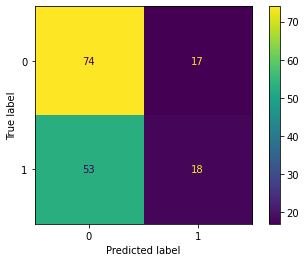

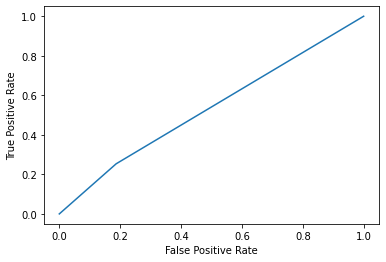

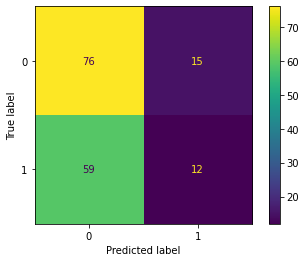

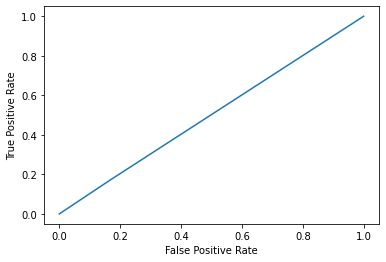

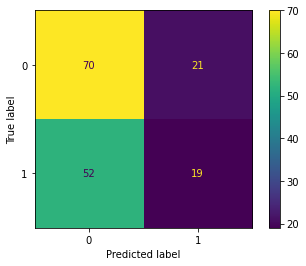

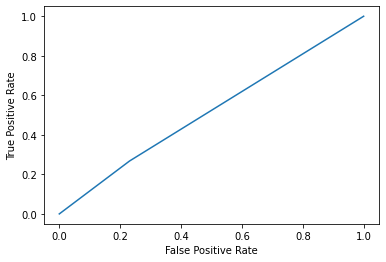

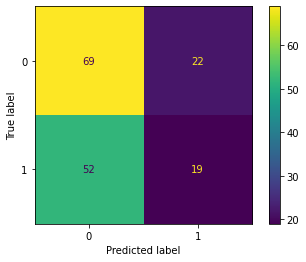

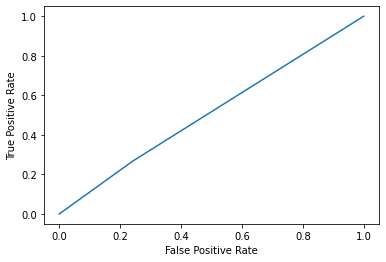

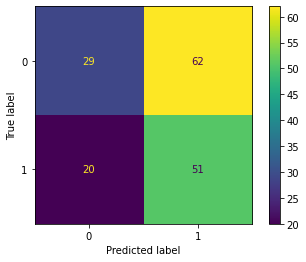

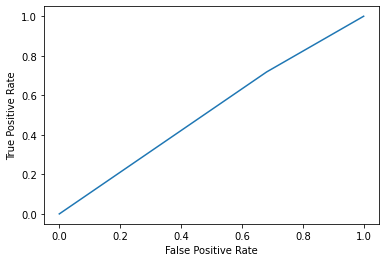

In [37]:
wandb.init(project='MDD-guido2020-classification-Reho')  

#Sample elements randomly 
test_loader  = torch.utils.data.DataLoader(test_dataset_cv , batch_size=batch_size, shuffle=True)

accuracy_fold=[]
F1_score_fold=[]
bal_acc_fold=[]

for k in np.arange(5): 

    print(f'Start TEST FOR FOLD {k}')

    path_fold = f'/data/zmohaghegh/TempStats_3D-CNN/best_valid_acc_reho_2020/model-best-reho-fold-{k}.pth'

    network.load_state_dict(torch.load(path_fold))

    test_loss_cv=0
    total = 0
    correct=0

    F1_labels=[]
    F1_pred=[]

    network.eval() # preoare model for test and evaluation

    with torch.no_grad():
        #print('Start testing CV...')
        for i, data in enumerate(test_loader, 0):
            #print(f'test {i}')

            inputs, lables = data

            outputs = network(inputs)

            lables=lables.double()
            outputss=outputs.squeeze(1) #[10,1] ---> [10]

            #do the prediction 
            predicted = outputss.data > 0.0

            #calculate loss
            loss = loss_function(outputss, lables)

            test_loss_cv += loss.item()
            correct += (predicted == lables).sum().item()
            total += lables.size(0)

            if i==0:
                F1_labels=lables.int().numpy()
                F1_pred=predicted.int().numpy()
            else:
                F1_labels= np.concatenate((F1_labels, lables.int().numpy()))
                F1_pred = np.concatenate((F1_pred, predicted.int().numpy()))
            
        wandb.log({ "test_Acc_CV": 100 * correct /total  , "test_Loss_CV": test_loss_cv/total })
        
        accuracy=100 * correct /total
        acc = accuracy_score(F1_labels, F1_pred)
        bal_acc= balanced_accuracy_score(F1_labels, F1_pred)

        F1_Score = f1_score(F1_labels, F1_pred, average='weighted')
        tn, fp, fn, tp = confusion_matrix(F1_labels, F1_pred).ravel()
        
        F1_score_fold.append(F1_Score)
        bal_acc_fold.append(bal_acc)
        accuracy_fold.append(accuracy)
        
        #PLotting Confusion matrix and ROC curve
        conf_matrix = confusion_matrix(F1_labels, F1_pred)
        conf_matrix_display = ConfusionMatrixDisplay(conf_matrix).plot()
        fp_rate, tp_rate, threshold = roc_curve(F1_labels, F1_pred)
        ROC_display = RocCurveDisplay(fpr=fp_rate, tpr=tp_rate).plot()

        wandb.log({ "test_balanced_Acc_CV": bal_acc , "test_Acc_CV": 100 * correct /total, "test_F1_score_CV": F1_Score , "test_Loss_CV": test_loss_cv/total })
        
        print(f'test_Acc_CV": {accuracy}')
        print(f'F1_score CV ReHo :{F1_Score}')
        print(f'Balanced ACC CV ReHo :{bal_acc}')
        print(f'Loss CV ReHo : {test_loss_cv/total}')

In [38]:
import statistics

accuracy_avg=sum(accuracy_fold)/len(accuracy_fold)
accuracy_std=statistics.pstdev(accuracy_fold)


F1_score_avg= sum(F1_score_fold)/len(F1_score_fold)
F1_score_std= statistics.pstdev(F1_score_fold)

bal_acc_avg = sum(bal_acc_fold)/len(bal_acc_fold)
bal_acc_std = statistics.pstdev(bal_acc_fold)

#print(f' Average Accuracy ReHo ={accuracy_avg}')
#print(f'standard deviation :{accuracy_std}')

print(f' Average Balance ACC ReHo ={bal_acc_avg}')
print(f'standard deviation :{bal_acc_std}')

print(f' Average F1_score ReHo = { F1_score_avg}')
print(f'standard deviation :{F1_score_std}')

 Average Balance ACC ReHo =0.5170561832533663
standard deviation :0.01010569240544706
 Average F1_score ReHo = 0.504921805293976
standard deviation :0.02088393098522864
